In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Import the Excel

In [17]:
# Load the dataset
#df = pd.read_excel("Models\IWA_new.xlsx", sheet_name='Final Raw Sample(0%)')
df = pd.read_csv("Sales_no_outliers_brewery_only.csv")
df =df.iloc[:,1:]
df = df.drop("Industry (Exiobase)", axis=1)
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,...,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue
0,2019,BUDWEISER BREWING CO,CAYMAN ISLANDS,Brewers,-7.019612,-37.638941,-4.620955e+08,-9.374737e+07,-5.613027e+07,-5.610149e+07,...,-21847.771988,-140.450129,-28.052546,-25278.227923,-167.406661,1886.414782,1886.414782,-8773.429720,0.017490,6.582921e+09
1,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-6.596233,-46.522794,-6.978419e+08,-1.312285e+08,-8.299596e+07,-8.293132e+07,...,-77571.792798,-1113.208360,-326.988191,-37024.568588,-1326.865949,15176.840942,15176.840942,-12261.768244,0.059202,1.057940e+10
2,2019,COMPANIA CERVECERIAS UNIDAS,CHILE,Brewers,-6.415653,-54.146661,-1.555141e+08,-2.303933e+07,-1.293947e+07,-1.292463e+07,...,-65916.007408,-104.142317,-467.109898,-5751.475432,-124.130306,-1430.679992,-55213.362037,-2224.738635,0.084882,2.423979e+09
3,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-3.388736,-11.492977,-1.778566e+09,-6.965774e+08,-4.290178e+08,-4.283553e+08,...,-222519.248882,-3914.291085,-325.789140,-190769.424529,-4665.559245,56659.806086,56659.806086,-64862.799133,0.080199,5.248464e+10
4,2019,CARLSBERG A/S,DENMARK,Brewers,-2.414563,-16.054846,-2.388141e+08,-8.690818e+07,-6.061812e+07,-6.058032e+07,...,-366663.271634,-1480.449400,-288.844325,-27951.868900,-1764.591400,19253.589023,19132.282417,-8148.334758,0.029599,9.890572e+09


In [18]:
brewery_df = df.copy()
for column in brewery_df.loc[:,"SDG 1.5":"SDG 15.5"]:
    #print(column)
    brewery_df[column] = (brewery_df[column] / brewery_df['Revenue'])*100

# Filter for only the Brewery Category with more than 10 datapoints

In [19]:
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 8].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
#filtered_df.shape
filtered_df

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,...,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue
1,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-6.596233,-46.522794,-6.978419e+08,-1.240416,-0.784505,-0.783894,...,-0.000733,-1.052241e-05,-3.090801e-06,-0.000350,-1.254198e-05,0.000143,0.000143,-0.000116,0.059202,1.057940e+10
3,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Brewers,-3.388736,-11.492977,-1.778566e+09,-1.327202,-0.817416,-0.816154,...,-0.000424,-7.457975e-06,-6.207324e-07,-0.000363,-8.889381e-06,0.000108,0.000108,-0.000124,0.080199,5.248464e+10
4,2019,CARLSBERG A/S,DENMARK,Brewers,-2.414563,-16.054846,-2.388141e+08,-0.878697,-0.612888,-0.612506,...,-0.003707,-1.496829e-05,-2.920401e-06,-0.000283,-1.784115e-05,0.000195,0.000193,-0.000082,0.029599,9.890572e+09
5,2019,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-1.898778,-12.419412,-5.102237e+08,-0.721153,-0.454323,-0.453865,...,-0.000738,-5.427833e-06,-6.280700e-07,-0.000203,-6.469595e-06,0.000077,0.000077,-0.000067,0.093336,2.687117e+10
7,2019,HEINEKEN NV,NETHERLANDS,Brewers,-1.709847,-10.508374,-4.594560e+08,-0.721667,-0.454622,-0.454164,...,-0.000738,-5.427833e-06,-6.280700e-07,-0.000203,-6.469595e-06,0.000077,0.000077,-0.000067,0.101854,2.687117e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2010,HEINEKEN HOLDING NV,NETHERLANDS,Brewers,-3.025953,-23.503949,-6.550440e+08,-1.069281,-0.729239,-0.728616,...,-0.000765,-1.063398e-05,-6.511741e-07,-0.000353,-1.267496e-05,0.000154,0.000154,-0.000102,0.151424,2.164753e+10
86,2010,HEINEKEN NV,NETHERLANDS,Brewers,-2.670526,-20.743185,-5.781028e+08,-1.069281,-0.729239,-0.728616,...,-0.000765,-1.063398e-05,-6.511741e-07,-0.000353,-1.267496e-05,0.000154,0.000154,-0.000102,0.008737,2.164753e+10
87,2010,CARLSBERG A/S,DENMARK,Brewers,-2.321684,-14.921489,-2.510669e+08,-0.838688,-0.760202,-0.759683,...,-0.003608,-2.986759e-05,-2.842151e-06,-0.000404,-3.560007e-05,0.000416,0.000414,-0.000083,0.020611,1.081400e+10
88,2010,KIRIN HOLDINGS CO LTD,JAPAN,Brewers,-1.970958,-28.311453,-5.292861e+08,-0.838814,-0.500798,-0.500521,...,-0.000138,-2.115868e-06,-4.007053e-07,-0.000221,-2.521966e-06,0.000028,0.000028,-0.000078,0.006961,2.685426e+10


# Try visualization with Boxplots


## On the most important SDGs

In [22]:
df_opinc_box = filtered_df.melt(id_vars='GICS Sub-Industry', value_vars=filtered_df.loc[:,"SDG 1.5":"SDG 15.5"])
df_opinc_box

,GICS Sub-Industry,variable,value
0,Brewers,SDG 1.5,-1.240416
1,Brewers,SDG 1.5,-1.327202
2,Brewers,SDG 1.5,-0.878697
3,Brewers,SDG 1.5,-0.721153
4,Brewers,SDG 1.5,-0.721667
...,...,...,...
1185,Brewers,SDG 15.5,-0.000102
1186,Brewers,SDG 15.5,-0.000102
1187,Brewers,SDG 15.5,-0.000083
1188,Brewers,SDG 15.5,-0.000078


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


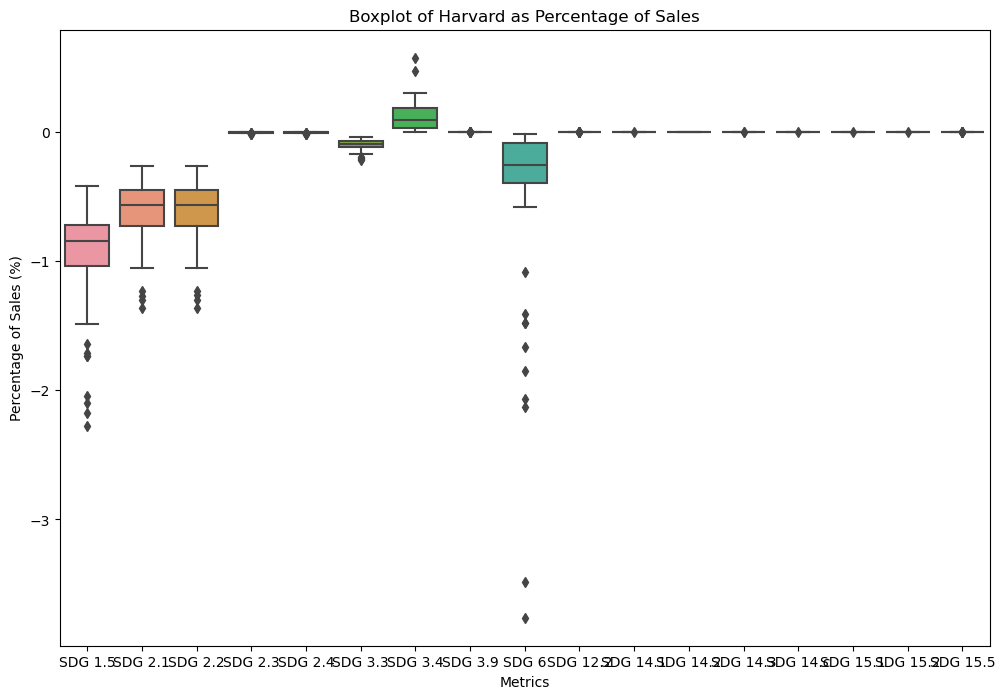

In [23]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Sales (%)')
plt.title('Boxplot of Harvard as Percentage of Sales')
plt.show()

SDG 12 to 15.5 are almost all 0 within the industry!

# Check on Total Annual Cost on Environment

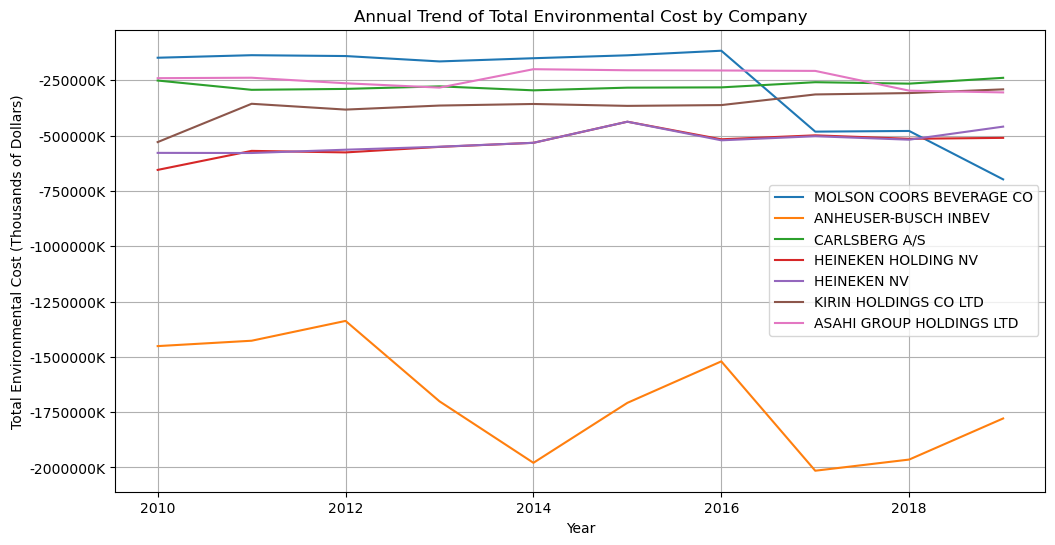

In [26]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels in thousands
def thousands(x, pos):
    'The two args are the value and tick position'
    return f'{x / 1000:.0f}K'

# Create a FuncFormatter object using the thousands function
formatter = FuncFormatter(thousands)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Total Environmental Cost"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (Thousands of Dollars)")
plt.title("Annual Trend of Total Environmental Cost by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()

# Annual trend on Sales Intensity

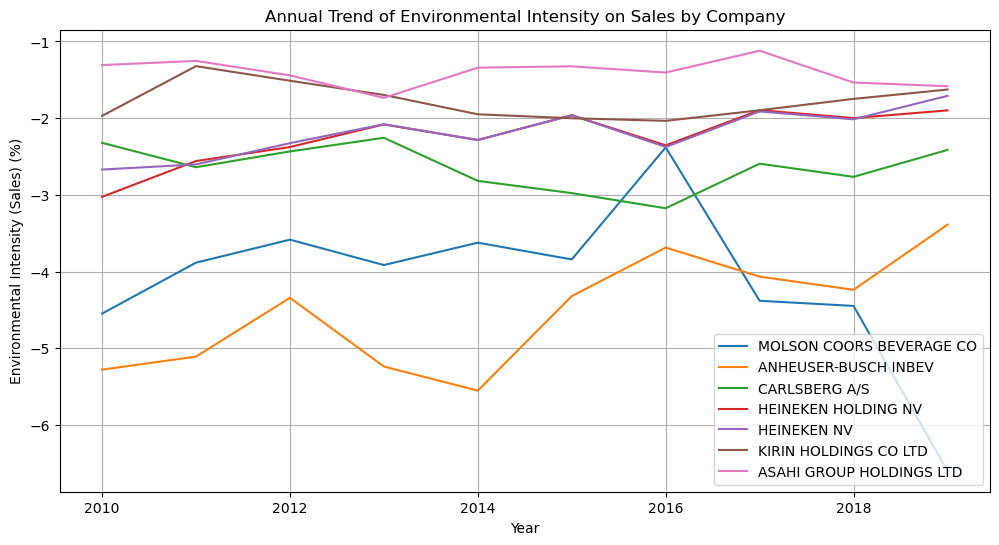

In [30]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Environmental Intensity (Sales)"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Environmental Intensity (Sales) (%)")
plt.title("Annual Trend of Environmental Intensity on Sales by Company")
plt.legend(loc="best")


# Show the plot
plt.grid()
plt.show()

# Annual Trend on Op Income Intensity

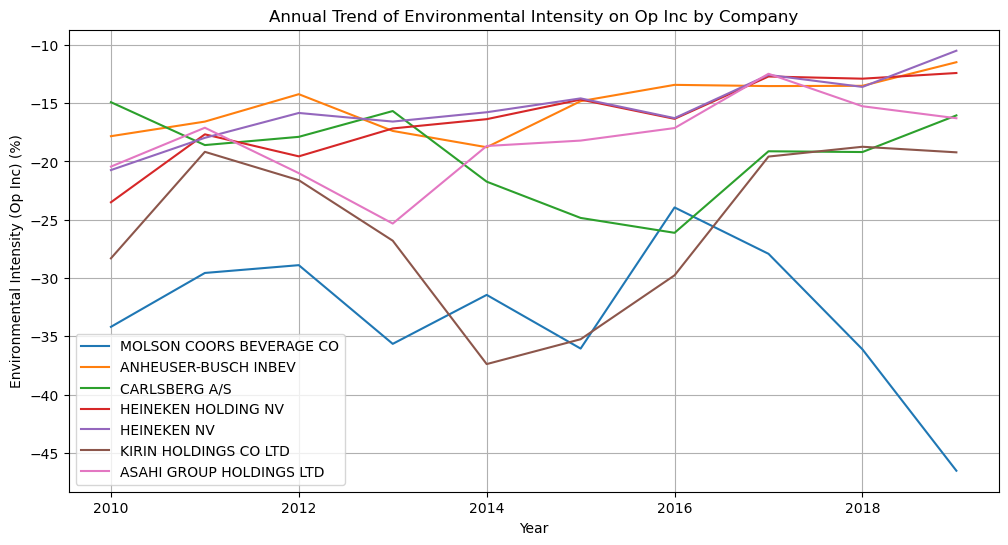

In [32]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Environmental Intensity (Op Inc)"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Environmental Intensity (Op Inc) (%)")
plt.title("Annual Trend of Environmental Intensity on Op Inc by Company")
plt.legend(loc="best")


# Show the plot
plt.grid()
plt.show()

# Find Molson Ranking in the Industry when looking at SDGs (See excel)